<a href="https://colab.research.google.com/github/chandrika1004/PRODIGY_DS_04/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prodigy Infotech Datascience Internship Task 4

#TASK: Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

##Import necessary libraries

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

##Loading the dataset

In [246]:
twitter=pd.read_csv('twitter_training.csv')
twitter

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [247]:
print(twitter.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


##Basic data cleaning

In [248]:
twitter.info()
twitter.isnull().sum()
twitter=twitter.dropna(subset=['im getting on borderlands and i will murder you all ,'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


##Sentiment Analysis using VADER

In [249]:
twitter=twitter.copy()
sia=SentimentIntensityAnalyzer()
twitter.loc[:,'sentiment_score']=twitter['im getting on borderlands and i will murder you all ,'].apply(lambda x:sia.polarity_scores(x)['compound'])
def get_sentiment(score):
  if score>0.05:
    return 'Positive'
  elif score<-0.05:
    return 'Negative'
  else:
    return 'Neutral'
twitter.loc[:,'sentiment']=twitter['sentiment_score'].apply(get_sentiment)
twitter[['im getting on borderlands and i will murder you all ,','sentiment_score','sentiment']].head()

,"im getting on borderlands and i will murder you all ,",sentiment_score,sentiment
0,I am coming to the borders and I will kill you...,-0.6908,Negative
1,im getting on borderlands and i will kill you ...,-0.6908,Negative
2,im coming on borderlands and i will murder you...,-0.6908,Negative
3,im getting on borderlands 2 and i will murder ...,-0.6908,Negative
4,im getting into borderlands and i can murder y...,-0.6908,Negative


##Sentiment Distribution

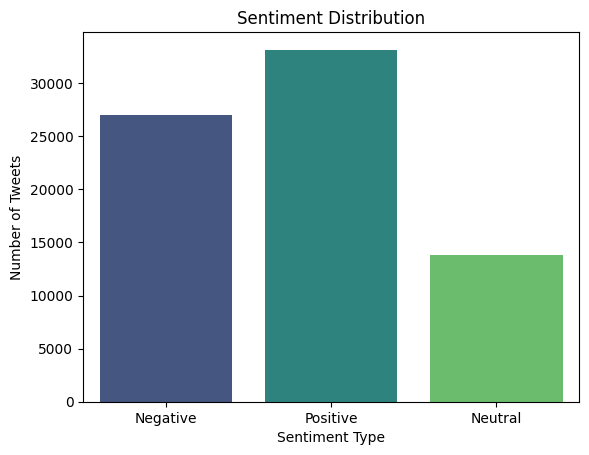

In [250]:
sns.countplot(x='sentiment',hue='sentiment',data=twitter,palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Number of Tweets')
plt.show()

##WordCloud for Positive Tweets

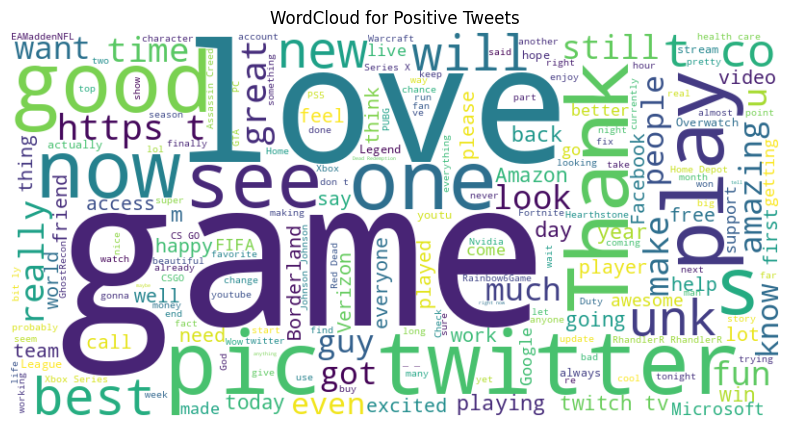

In [251]:
positive_tweets=twitter[twitter['sentiment']=='Positive']['im getting on borderlands and i will murder you all ,'].astype(str).str.cat(sep='')
custom_stopwords=set(STOPWORDS)
custom_stopwords.update(["fucking","fuck","shit","damn","ass"])
wordcloud=WordCloud(background_color='white',width=800,height=400,stopwords=custom_stopwords,colormap='viridis').generate(positive_tweets)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Positive Tweets')
plt.show()